## Identifying and Recommending Best Restaurants
By Sankar Chakraborty 

Problem Statement :Problem Statement

A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

Approach:
1.	Data Preliminary analysis:
a.	Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.

b.	Based on the findings from the previous questions identify duplicates and remove them.


2.Prepare a preliminary report of the given data by answering following questions. Expressing the results using graphs and plot will make it more appealing.

a.	Explore the geographical distribution of the restaurants, finding out the cities  with maximum / minimum number of restaurants.

b.	Explore how ratings are distributed overall.

c.	Restaurant franchise is a thriving venture. So, it becomes very important to explore the franchise with most national presence.

d.	What is the ratio between restaurants that allow table booking vs that do not allow table booking? 

e.	What is the percentage of restaurants providing online delivery?

f.	Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?

g.	What are the top 10 cuisines served across cities?

h.	What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Ratings

i.	Discuss the cost vs the other variables.

j.	Explain the factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option etc.


All the information gathered here will lead to a better understanding of the data and allow for a better implementation of ML models.


In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing, Understanding, and Inspecting Data :

In [2]:
# importing  1st dataset

restaurants_data = pd.read_excel(r"C:\Users\xyz\Downloads\CAPSTONE\data.xlsx")
restaurants_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [3]:
# importing  2nd dataset

CountryCode = pd.read_excel(r"C:\Users\xyz\Downloads\CAPSTONE\Country-Code.xlsx")
CountryCode.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
# merging  both dataset BestRestaurants and CountryCode

restaurants_data1 = pd.merge(restaurants_data,CountryCode, on='Country Code', how='left')
restaurants_data1 .head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


## 1.a.Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.
## b.Based on the findings from the previous questions identify duplicates and remove them.

In [5]:
# check for the structure of the data

restaurants_data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [6]:
# Replacing spaces between name of the columns with '_' 

restaurants_data1.columns =restaurants_data1.columns.str.replace(' ','_')
restaurants_data1.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [7]:
# getting rows and columns using 'shape' function

restaurants_data1.shape



(9551, 20)

In [8]:
# Checking for the missing values

restaurants_data1.isna().sum()


Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [9]:
# Find  MODE  of the the  column Restaurant_Name   and Cuisines        

restaurants_data1['Restaurant_Name'].mode() ,restaurants_data1['Cuisines'].mode()

(0    Cafe Coffee Day
 dtype: object,
 0    North Indian
 dtype: object)

In [10]:
# finding the record where  has the  missing value

restaurants_data1[restaurants_data1['Restaurant_Name'].isnull()],
restaurants_data1[restaurants_data1['Cuisines'].isnull()]


,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
9083,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9086,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9094,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9406,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9494,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9504,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9533,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9535,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9539,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [11]:
# 'Restaurant_Name' has 1 missing value,and cuisines have 9 it is an object datatype column, 
# so replacing with their  mode values
restaurants_data1['Restaurant_Name'].fillna('Cafe Coffee Day', inplace=True),
restaurants_data1['Cuisines'].fillna("North Indian",inplace=True)


In [12]:
restaurants_data1.isna().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [13]:
#Based on the findings from the previous questions, identify duplicates and remove them
restaurants_data1[restaurants_data1.duplicated()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country


# So we have no duplicate data

# Performing EDA :
## Explore the geographical distribution of the restaurants

In [14]:
# Country wise Restaurants distribution

country_rest = restaurants_data1.groupby(['Country_Code','Country'])['Restaurant_ID'].count()
country_rest.nlargest(20)

Country_Code  Country       
1             India             8652
216           United States      434
215           United Kingdom      80
30            Brazil              60
189           South Africa        60
214           UAE                 60
148           New Zealand         40
208           Turkey              34
14            Australia           24
162           Phillipines         22
94            Indonesia           21
166           Qatar               20
184           Singapore           20
191           Sri Lanka           20
37            Canada               4
Name: Restaurant_ID, dtype: int64

#### we found that India has highest no of restaurants  is 8652 
####               USA has 2nd highest no of restaurants is 434
####               Canada has least no of restaurants is 4

<AxesSubplot:ylabel='Country_Code,Country'>

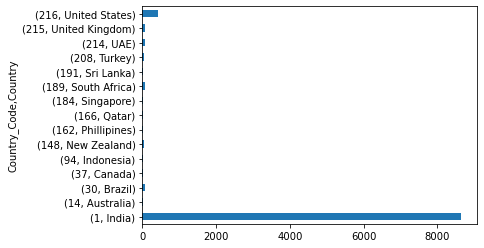

In [15]:
# visualization of the above distribution

country_rest.plot(kind='barh')

# Here we can see that India which has highest no of restaurants at the bottom and 2nd highest USA at the top

## Identify the cities with the maximum and minimum number of restaurants

In [16]:
# Citi wise Restaurants distribution

citi_rest = restaurants_data1.groupby(['Country','City']).agg(Count = ('Restaurant_ID','count'))
citi_rest


Count
Country       City                 
Australia     Armidale            1
              Balingup            1
              Beechworth          1
              Dicky Beach         1
              East Ballina        1
...                             ...
United States Valdosta           20
              Vernonia            1
              Waterloo           20
              Weirton             1
              Winchester Bay      1

[141 rows x 1 columns]

In [17]:
citi_rest.sort_values(by='Count', ascending=False)



Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]


##### We found New Delhi has highest no of Restaurants is 5473
##### Gurgaon has 2nd highest no of Restaurants is 1118

##### MAXIMUM NO OF RESTAURANTS OF EACH CITY:- 
#### New Delhi : 5473  ,Gurgaon:	1118,  Noida:	1080 ,Faridabad:	251 ,Ghaziabad:	25

In [18]:

# MINIMUM NO OF RESTAURANTS OF EACH CITY:-
citi_rest.sort_values(by='Count', ascending=True)


# we found that-
#### Australia	Armidale	1
     
#### Canada	Vineland Station-1,Yorkton	1
   
#### India	Mohali	1,Panchkula	1



Count
Country   City                   
Australia Armidale              1
Canada    Vineland Station      1
          Yorkton               1
India     Mohali                1
          Panchkula             1
...                           ...
          Ghaziabad            25
          Faridabad           251
          Noida              1080
          Gurgaon            1118
          New Delhi          5473

[141 rows x 1 columns]

# Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

In [19]:
restaurants_data1.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [20]:
restaurants_data1.groupby(['Restaurant_Name','Country'])['Country'].count().nlargest(10) 

# following countries has most no of restaurants

Restaurant_Name   Country
Cafe Coffee Day   India      84
Domino's Pizza    India      79
Subway            India      63
Green Chick Chop  India      51
McDonald's        India      48
Keventers         India      34
Giani             India      29
Pizza Hut         India      29
Baskin Robbins    India      28
Barbeque Nation   India      25
Name: Country, dtype: int64

In [21]:
len(restaurants_data1['Restaurant_Name'].unique())

7445

In [22]:
len(restaurants_data1['Restaurant_ID'].unique())

9551

In [23]:
restaurants_data1['Country'].unique()

array(['Indonesia', 'India', 'Phillipines', 'Sri Lanka', 'South Africa',
       'Qatar', 'Singapore', 'UAE', 'Brazil', 'Turkey', 'United Kingdom',
       'New Zealand', 'Australia', 'United States', 'Canada'],
      dtype=object)

# Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking

In [24]:
restaurants_data1['Has_Table_booking'].replace(['No','Yes'],[0,1], inplace=True)

In [25]:
restaurants_data1.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),0,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),0,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),0,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),0,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),0,No,3,4.3,Green,Very Good,243,Indonesia


In [26]:
restaurants_data1[restaurants_data1['Has_Table_booking']==0]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),0,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),0,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),0,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),0,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),0,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),0,No,1,4.3,Green,Very Good,63,India
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),0,No,1,3.6,Yellow,Good,34,India
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),0,No,1,3.9,Yellow,Good,127,India
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),0,No,1,3.8,Yellow,Good,78,India


In [27]:
restaurants_data1[restaurants_data1['Has_Table_booking']==1]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
21,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000,Indian Rupees(Rs.),1,No,4,4.0,Green,Very Good,145,India
24,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),1,No,4,4.9,Dark Green,Excellent,621,Phillipines
25,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000,Indian Rupees(Rs.),1,No,4,3.2,Orange,Average,12,India
26,2724,1911 - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,Indian Rupees(Rs.),1,No,4,3.9,Yellow,Good,272,India
27,2725,The Spice Route - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"Malaysian, Thai, Kerala, Vietnamese, Sri Lankan",6000,Indian Rupees(Rs.),1,No,4,4.0,Green,Very Good,259,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,6801873,Mr Cooper's House & Garden - The Midland,215,Manchester,"The Midland, Peter Street, Deansgate, Manchest...","The Midland, Deansgate","The Midland, Deansgate, Manchester",-2.245034,53.477358,"European, Mediterranean, Contemporary",55,Pounds(å£),1,No,3,4.2,Green,Very Good,67,United Kingdom
9020,7601102,Chaophraya,215,Edinburgh,"4th Floor, 33 Castle Street, New Town, Edinbur...",New Town,"New Town, Edinburgh",-3.203159,55.952221,Thai,50,Pounds(å£),1,No,4,4.3,Green,Very Good,61,United Kingdom
9040,6104220,Roti Chai,215,London,"3 Portman Mews South, Marble Arch, London W1H 6HS","Portman Mews South, Marble Arch","Portman Mews South, Marble Arch, London",-0.155732,51.514641,"Indian, Street Food",45,Pounds(å£),1,No,3,4.5,Dark Green,Excellent,367,United Kingdom
9184,6900224,Chaophraya,215,Birmingham,"Middle Mall, Bullring Shopping Centre, Special...","Bullring Shopping Centre, Southside","Bullring Shopping Centre, Southside, Birmingham",-1.894286,52.477633,Thai,30,Pounds(å£),1,No,2,3.9,Yellow,Good,22,United Kingdom


In [28]:
restaurants_data1[restaurants_data1['Has_Table_booking']==0].count()

Restaurant_ID           8393
Restaurant_Name         8393
Country_Code            8393
City                    8393
Address                 8393
Locality                8393
Locality_Verbose        8393
Longitude               8393
Latitude                8393
Cuisines                8393
Average_Cost_for_two    8393
Currency                8393
Has_Table_booking       8393
Has_Online_delivery     8393
Price_range             8393
Aggregate_rating        8393
Rating_color            8393
Rating_text             8393
Votes                   8393
Country                 8393
dtype: int64

In [29]:
restaurants_data1[restaurants_data1['Has_Table_booking']==1].count()

Restaurant_ID           1158
Restaurant_Name         1158
Country_Code            1158
City                    1158
Address                 1158
Locality                1158
Locality_Verbose        1158
Longitude               1158
Latitude                1158
Cuisines                1158
Average_Cost_for_two    1158
Currency                1158
Has_Table_booking       1158
Has_Online_delivery     1158
Price_range             1158
Aggregate_rating        1158
Rating_color            1158
Rating_text             1158
Votes                   1158
Country                 1158
dtype: int64

In [30]:
Has_table_book = restaurants_data1[restaurants_data1['Has_Table_booking']==1]['Restaurant_ID'].count()

Has_not_table_book = restaurants_data1[restaurants_data1['Has_Table_booking']==0]['Restaurant_ID'].count()

In [31]:
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
      round((Has_table_book/Has_not_table_book),2))

# SO, WE FOUND THAT RATIO B/W TABLE BOOKING AND NON TABLE BOOKING IS 0.14

Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


In [32]:
restaurants_data1['Has_Table_booking'].value_counts()

0    8393
1    1158
Name: Has_Table_booking, dtype: int64

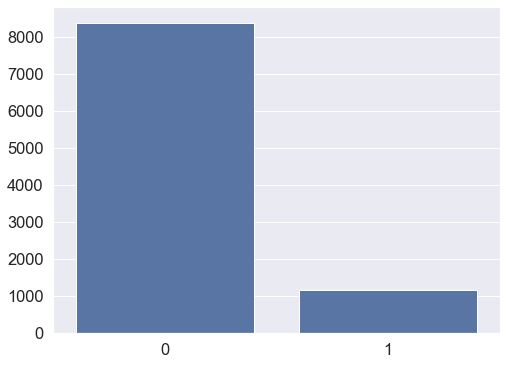

In [33]:
plt.figure(figsize=(8,6))
sns.set_style(style='darkgrid')
sns.set(font_scale=1.5)

sns.barplot(list(restaurants_data1['Has_Table_booking'].value_counts().keys()),
                list(restaurants_data1['Has_Table_booking'].value_counts()), color='b')
plt.show()

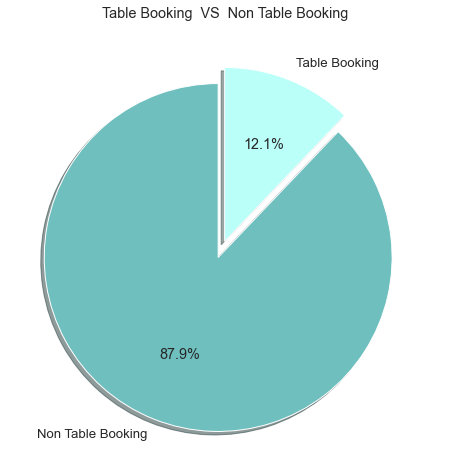

In [34]:
plt.figure(figsize=(10,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
labels = 'Non Table Booking','Table Booking'
colors='#6fbfbf','#bbfff9'
explode = (0.1,0)
plt.pie(list(restaurants_data1['Has_Table_booking'].value_counts()),
       labels=labels,
       explode=explode,colors=colors ,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title("Table Booking  VS  Non Table Booking")
plt.show()



#### here, Table Booking contains 12.1%  and Non Table Booking contains 87.9% of the whole .
####  Most of the Restaurants do not allow table booking.
#### They want customers to reach  their Restaurants for food.

# Find out the percentage of restaurants providing online delivery

In [35]:
restaurants_data1.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),0,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),0,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),0,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),0,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),0,No,3,4.3,Green,Very Good,243,Indonesia


In [36]:
restaurants_data1['Has_Online_delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
restaurants_data1['Has_Online_delivery'].value_counts()

No     7100
Yes    2451
Name: Has_Online_delivery, dtype: int64

In [38]:
rest_online_deli = restaurants_data1[restaurants_data1['Has_Online_delivery']=='Yes']['Restaurant_ID'].count()

In [39]:
rest_no_online_deli = restaurants_data1[restaurants_data1['Has_Online_delivery']=='No']['Restaurant_ID'].count()

In [40]:
# to get percentaage of how many restaurants has online delivery we do

print("Percentage of Restaurants which has online delivery: {} %".format((round(rest_online_deli/len(restaurants_data1),3)*100)))


Percentage of Restaurants which has online delivery: 25.7 %


#### 25.7% of resturants are having online delivery facility.

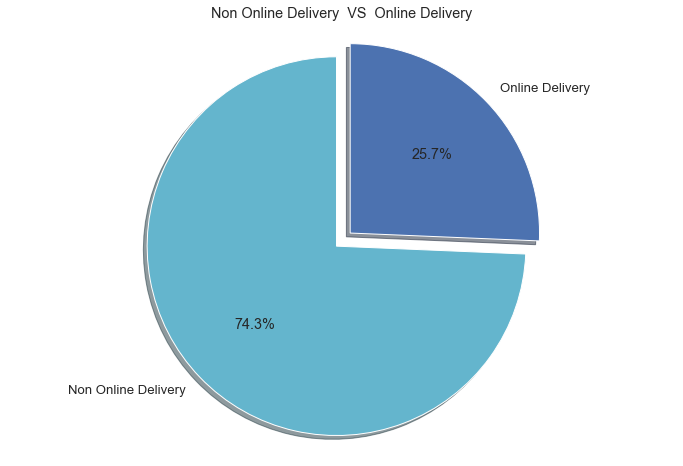

In [41]:
# Creating a pie chart for online delivery

plt.figure(figsize=(12,8))
colors = ['c','b']
explode = (0.1,0)
labels = ['Non Online Delivery','Online Delivery']

plt.pie(list(restaurants_data1['Has_Online_delivery'].value_counts()),
       labels =labels, explode=explode,colors=colors ,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title("Non Online Delivery  VS  Online Delivery")
plt.axis('equal')
plt.show()



### 74.3% resturants do not have online delivery while only 25.7% resturants have online delivery facility
#### Most of the resturants are not providing online delivery 

# Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [42]:
restaurants_data1.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),0,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),0,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),0,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),0,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),0,No,3,4.3,Green,Very Good,243,Indonesia


In [43]:
restaurants_data1.groupby(['Votes','Has_Online_delivery']).agg(count=('Votes','count'))

count
Votes Has_Online_delivery       
0     No                    1070
      Yes                     24
1     No                     464
      Yes                     19
2     No                     297
...                          ...
6907  No                       1
7574  Yes                      1
7931  Yes                      1
9667  Yes                      1
10934 No                       1

[1439 rows x 1 columns]

In [44]:
rest_dl_votes =restaurants_data1[restaurants_data1['Has_Online_delivery']=='Yes']['Votes'].sum()

In [45]:
rest_not_dl_votes =restaurants_data1[restaurants_data1['Has_Online_delivery']=='No']['Votes'].sum()

In [46]:
restaurants_data1.groupby(['Has_Online_delivery'])['Votes'].sum()

Has_Online_delivery
No     980731
Yes    517914
Name: Votes, dtype: int64

In [47]:
print('No. of Votes: that deliver online VS Votes: that do not deliver online: ',(rest_not_dl_votes-rest_dl_votes))

No. of Votes: that deliver online VS Votes: that do not deliver online:  462817


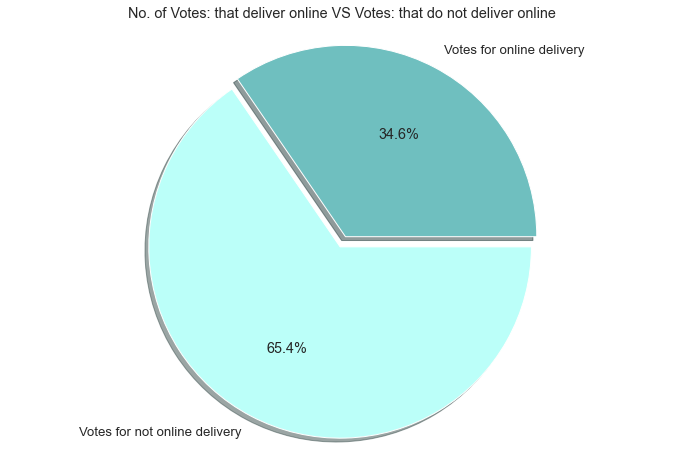

In [48]:
# Creating a pie chart for No. of Votes: that deliver online VS Votes: that do not deliver online:

plt.figure(figsize=(12,8))
labels = ['Votes for online delivery','Votes for not online delivery']
sizes = [rest_dl_votes,rest_not_dl_votes]
explode = (0.06,0)
colors='#6fbfbf','#bbfff9'

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%0.1f%%', shadow=True)
plt.title('No. of Votes: that deliver online VS Votes: that do not deliver online')
plt.axis('equal')
plt.show()


# What are the top 10 cuisines served across cities?

In [49]:
restaurants_data1.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),0,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),0,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),0,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),0,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),0,No,3,4.3,Green,Very Good,243,Indonesia


In [50]:
top_10_Cuisines =restaurants_data1.groupby(['Cuisines'])['City'].count().nlargest(10)
top_10_Cuisines

Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: City, dtype: int64

In [51]:
len(restaurants_data1['Cuisines'].unique())

1825

In [52]:
# Spliting the cuisines columns into different cuisines and assign column names

cuisines = restaurants_data1['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines.columns = ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# concatenating with main dataframe
cuisines_data = pd.concat([restaurants_data1, cuisines], axis=1)
cuisines_data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Votes,Country,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,1498,Indonesia,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,873,Indonesia,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,605,Indonesia,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,395,Indonesia,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,243,Indonesia,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# selecting ['Country','City','Locality_Verbose','Cuisine_1','Cuisine_2','Cuisine_3',
#                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
# columns where we will do further analysis

cuisines_local= pd.DataFrame(cuisines_data[['Country','City','Locality_Verbose','Cuisine_1','Cuisine_2','Cuisine_3',
                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])

In [55]:
cuisines_local

,Country,City,Locality_Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Indonesia,Jakarta,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,Jakarta,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Indonesia,Jakarta,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,Jakarta,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,Jakarta,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9546,India,Dehradun,"Jakhan, Dehradun",Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,India,Kanpur,"Mall Road, Kanpur",Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,India,Kanpur,"Parade, Kanpur",Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,India,Varanasi,"Dashaswmedh Road, Varanasi",Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# stacking the columns

cuisines_local_stacked = pd.DataFrame(cuisines_local.stack())
cuisines_local.head()

,Country,City,Locality_Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Indonesia,Jakarta,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,Jakarta,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Indonesia,Jakarta,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,Jakarta,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,Jakarta,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Melting the data

keys = [c for c in cuisines_local  if c.startswith('Cuisine')]

a= pd.melt(cuisines_local, id_vars='Locality_Verbose', value_vars=keys, value_name='Cuisines')

#melting the stack into one row for further analysis 

max_rate = pd.DataFrame(a.groupby(by=['Locality_Verbose','variable','Cuisines']).size().reset_index())

# find the highest restuarant in the city
max_rate

# we don't need variable column, so we delete that
del max_rate['variable']

# setting the column names
max_rate.columns = ['Locality_Verbose','Cuisines','Count']
max_rate.head()


,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [58]:
# find the highest restuarant in the city

loc = max_rate.sort_values(by='Count', ascending=False).groupby(['Locality_Verbose'], as_index=False).first()
loc.head()

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


In [59]:
# merging two dataframes, loc and restaurants_data1

Rest = loc.merge(restaurants_data1, left_on='Locality_Verbose', right_on='Locality_Verbose', how='inner')
Rest.head()

,Locality_Verbose,Cuisines_x,Count,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,...,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road",77.039220,...,800,Indian Rupees(Rs.),1,Yes,2,2.7,Orange,Average,80,India
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road",77.039310,...,350,Indian Rupees(Rs.),0,No,1,3.4,Orange,Average,16,India
2,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1,90744,Exotica,1,Hyderabad,"Opposite Audi Showroom, 5th Floor, 12th Square...","12th Square Building, Banjara Hills",78.437225,...,1500,Indian Rupees(Rs.),1,Yes,3,4.3,Green,Very Good,3374,India
3,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1,15239,Basant Restaurant,1,Ludhiana,"Urban Estate, Main Market, Phase 1, Dugri, Lud...","A Hotel, Gurdev Nagar",75.842739,...,800,Indian Rupees(Rs.),0,No,2,3.6,Yellow,Good,93,India
4,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1,310281,Haldiram's,1,New Delhi,"1st Floor, ARSS Mall, Opposite Jwalaheri, Pasc...","ARSS Mall, Paschim Vihar",77.101544,...,500,Indian Rupees(Rs.),0,No,2,3.1,Orange,Average,117,India


In [60]:
# making a dataframe of rating restaurant
df = pd.DataFrame(Rest[['Country','City','Locality_Verbose','Cuisines_x','Count']])

# grouping the data by country code
country = Rest.sort_values(by='Count', ascending=False).groupby(['Country'], as_index=False).first()

con = pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])

# renaming the columns
con.columns= ['Country','City','Locality','Cuisines','Number of restaurants in the country']

# sorting the restaurants on the basis of the number of restaurants in the country
country_wise=con.sort_values('Number of restaurants in the country', ascending=False)

country_wise[:10]
final_country_wise=country_wise.drop(country_wise.index[[7,10]])

final_country_wise

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,North Indian,48
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
6,Phillipines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Japanese,2
8,Singapore,Singapore,"Marina Centre, Downtown Core",Seafood,2
9,South Africa,Cape Town,Green Point,Grill,2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,2
0,Australia,Victor Harbor,Victor Harbor,Australian,1


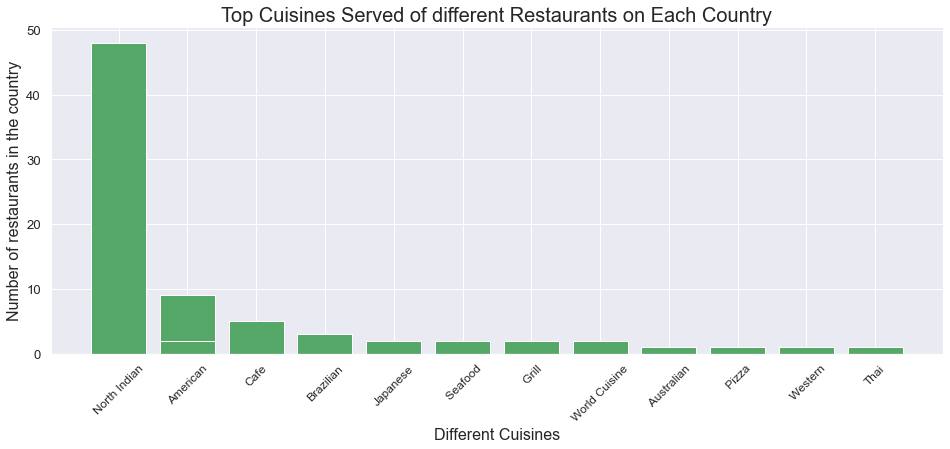

In [61]:
# Plotting number of Restaurants country wise

plt.figure(figsize=(16,6))
plt.bar(final_country_wise['Cuisines'], final_country_wise['Number of restaurants in the country'], color='g')
plt.title('Top Cuisines Served of different Restaurants on Each Country', fontsize=20)
plt.ylabel('Number of restaurants in the country', fontsize=16)
plt.xlabel('Different Cuisines', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()



##### North Indian is the most prefered cuisine across the restaurant for each city.
##### Around 48 Restaurants allows  North Indian cuisine to customers, as customers also prefered this.
##### American is the 2nd prefered cuisine across the restaurant for each city.
##### Around 9 Restaurants allows this cuisine to serve to customers

# What is the maximum and minimum number of cuisines that a restaurant serves?

In [62]:
restaurants_data1.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),0,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),0,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),0,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),0,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),0,No,3,4.3,Green,Very Good,243,Indonesia


In [63]:
restaurants_data1_new = restaurants_data1.merge(final_country_wise, left_on ='Country', right_on ='Country', how='outer')
restaurants_data1_new.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City_x,Address,Locality_x,Locality_Verbose,Longitude,Latitude,Cuisines_x,...,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,City_y,Locality_y,Cuisines_y,Number of restaurants in the country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,3,4.1,Green,Very Good,1498,Indonesia,Jakarta,Tebet,Western,1.0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,3,4.6,Dark Green,Excellent,873,Indonesia,Jakarta,Tebet,Western,1.0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,3,4.9,Dark Green,Excellent,605,Indonesia,Jakarta,Tebet,Western,1.0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,3,4.2,Green,Very Good,395,Indonesia,Jakarta,Tebet,Western,1.0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,3,4.3,Green,Very Good,243,Indonesia,Jakarta,Tebet,Western,1.0


In [64]:
print(restaurants_data1.shape)
print(restaurants_data1_new.shape)

(9551, 20)
(9551, 24)


In [65]:
restaurants_data1_new.drop(['City_y','Locality_y'], axis=1,inplace=True)

In [66]:
restaurants_data1_new.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City_x,Address,Locality_x,Locality_Verbose,Longitude,Latitude,Cuisines_x,...,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Cuisines_y,Number of restaurants in the country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,0,No,3,4.1,Green,Very Good,1498,Indonesia,Western,1.0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,0,No,3,4.6,Dark Green,Excellent,873,Indonesia,Western,1.0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,0,No,3,4.9,Dark Green,Excellent,605,Indonesia,Western,1.0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,0,No,3,4.2,Green,Very Good,395,Indonesia,Western,1.0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,0,No,3,4.3,Green,Very Good,243,Indonesia,Western,1.0


In [67]:
restaurants_data1_new.rename(columns = {'City_x':'City','Locality_x':'Locality',
                                      'Cuisines_x':'Cuisines','Cuisines_y':'Cuisines_single'}, inplace=True)

In [68]:
restaurants_data1_new['Cuisines_single'].unique()

array([' Western', 'North Indian', 'Japanese', nan, ' Grill', 'Thai',
       ' Seafood', 'American', 'Brazilian', 'World Cuisine', 'Cafe',
       ' Australian', ' Pizza'], dtype=object)

In [69]:
restaurants_data1_new.isna().sum()

Restaurant_ID                             0
Restaurant_Name                           0
Country_Code                              0
City                                      0
Address                                   0
Locality                                  0
Locality_Verbose                          0
Longitude                                 0
Latitude                                  0
Cuisines                                  0
Average_Cost_for_two                      0
Currency                                  0
Has_Table_booking                         0
Has_Online_delivery                       0
Price_range                               0
Aggregate_rating                          0
Rating_color                              0
Rating_text                               0
Votes                                     0
Country                                   0
Cuisines_single                         100
Number of restaurants in the country    100
dtype: int64

In [70]:
# Replacing Null values with mode of that column i.e. "North Indian"

restaurants_data1_new['Cuisines_single'].fillna('North Indian', inplace=True)

In [71]:
restaurants_data1_new['Number of restaurants in the country'].mean()

44.444291609353506

In [72]:
# Replacing Null values with mean of that column 

restaurants_data1_new['Number of restaurants in the country'].fillna(restaurants_data1_new['Number of restaurants in the country'].mean(),
                                                                   inplace=True)

In [73]:
restaurants_data1_new.isna().sum()

Restaurant_ID                           0
Restaurant_Name                         0
Country_Code                            0
City                                    0
Address                                 0
Locality                                0
Locality_Verbose                        0
Longitude                               0
Latitude                                0
Cuisines                                0
Average_Cost_for_two                    0
Currency                                0
Has_Table_booking                       0
Has_Online_delivery                     0
Price_range                             0
Aggregate_rating                        0
Rating_color                            0
Rating_text                             0
Votes                                   0
Country                                 0
Cuisines_single                         0
Number of restaurants in the country    0
dtype: int64

In [74]:
rest_cuisine = pd.DataFrame(cuisines_data[['Restaurant_Name','City','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4',
                                         'Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])

#stacking the columns
rest_cuisine_stack=pd.DataFrame(rest_cuisine.stack())  
rest_cuisine.head()

,Restaurant_Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
keys1 = [c for c in rest_cuisine  if c.startswith('Cuisine')]
b=pd.melt(rest_cuisine, id_vars='Restaurant_Name', value_vars=keys, value_name='Cuisines') 

#melting the stack into one row
max_rate1=pd.DataFrame(b.groupby(by=['Restaurant_Name','variable','Cuisines']).size().reset_index()) 

#find the highest restuarant in the city
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant_Name','Cuisines','Count']
max_rate1.head(20)

,Restaurant_Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#OFF Campus,Cafe,1
7,#OFF Campus,Continental,1
8,#OFF Campus,Italian,1
9,#OFF Campus,Fast Food,1


In [76]:
max_rate1.sort_values('Count',ascending=False)



,Restaurant_Name,Cuisines,Count
2479,Cafe Coffee Day,Cafe,83
4600,Domino's Pizza,Pizza,79
4601,Domino's Pizza,Fast Food,78
12989,Subway,Healthy Food,63
12988,Subway,Salad,63
...,...,...,...
5570,Gabbar Meals,Mughlai,1
5571,Gabbar's Bar & Kitchen,North Indian,1
5572,Gabbar's Bar & Kitchen,Chinese,1
5573,Gabbar's Bar & Kitchen,Mexican,1


#### Cafe Coffee Day has the max number of cuisines and The least number of cuisines in a resaurant is 1.

# Also, which is the most served cuisine across the restaurant for each city?

In [77]:
restaurants_data1_new.groupby(['Cuisines','Restaurant_Name','City'])['Restaurant_Name'].count().nlargest(20)

Cuisines                                  Restaurant_Name       City     
Cafe                                      Cafe Coffee Day       New Delhi    57
Pizza, Fast Food                          Domino's Pizza        New Delhi    55
American, Fast Food, Salad, Healthy Food  Subway                New Delhi    38
Raw Meats, North Indian, Fast Food        Green Chick Chop      New Delhi    35
Fast Food, Burger                         McDonald's            New Delhi    33
Beverages                                 Keventers             New Delhi    24
Ice Cream, Desserts                       Giani                 New Delhi    24
                                          Giani's               New Delhi    17
Cafe                                      Cafe Coffee Day       Noida        13
Ice Cream                                 Baskin Robbins        New Delhi    13
Raw Meats, Fast Food                      Republic of Chicken   New Delhi    13
Fast Food, North Indian                   Twen

In [78]:
Cuisines_count = restaurants_data1_new.groupby(['Restaurant_Name','City','Cuisines_single']).agg(Count=('Cuisines_single','count'))
Cuisines_count

,,,Count
Restaurant_Name,City,Cuisines_single,
12212,Nashik,North Indian,1
Let's Burrrp,Noida,North Indian,1
#45,Mangalore,North Indian,1
#Dilliwaala6,Puducherry,North Indian,1
#InstaFreeze,New Delhi,North Indian,1
...,...,...,...
t Lounge by Dilmah,New Delhi,North Indian,1
tashas,Cape Town,Grill,1
wagamama,Wellington City,Cafe,1


In [79]:
Cuisines_count.sort_values(by='Count', ascending=False)[0:20]

# North Indian Cuisines is most served cuisines accross Restaurants on each city

,,,Count
Restaurant_Name,City,Cuisines_single,
Cafe Coffee Day,New Delhi,North Indian,57
Domino's Pizza,New Delhi,North Indian,55
Subway,New Delhi,North Indian,38
Green Chick Chop,New Delhi,North Indian,37
McDonald's,New Delhi,North Indian,33
Giani,New Delhi,North Indian,24
Keventers,New Delhi,North Indian,24
Giani's,New Delhi,North Indian,17
Aggarwal Sweets,New Delhi,North Indian,14


# What is the distribution cost across the restaurants?

In [80]:
restaurants_data1_new.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Cuisines_single,Number of restaurants in the country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,0,No,3,4.1,Green,Very Good,1498,Indonesia,Western,1.0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,0,No,3,4.6,Dark Green,Excellent,873,Indonesia,Western,1.0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,0,No,3,4.9,Dark Green,Excellent,605,Indonesia,Western,1.0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,0,No,3,4.2,Green,Very Good,395,Indonesia,Western,1.0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,0,No,3,4.3,Green,Very Good,243,Indonesia,Western,1.0


In [81]:
restaurants_data1_new.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country', 'Cuisines_single',
       'Number of restaurants in the country'],
      dtype='object')

In [82]:
restaurants_data1_new['Currency'].unique()

array(['Indonesian Rupiah(IDR)', 'Indian Rupees(Rs.)', 'Botswana Pula(P)',
       'Sri Lankan Rupee(LKR)', 'Rand(R)', 'Qatari Rial(QR)', 'Dollar($)',
       'Emirati Diram(AED)', 'Brazilian Real(R$)', 'Turkish Lira(TL)',
       'Pounds(å£)', 'NewZealand($)'], dtype=object)

In [83]:
# Now we define a function, so that we can standalized currency  with different countries.
def std_rupee(currency, cost):
    if currency == 'Indonesian Rupiah(IDR)':
        return cost*194.24
    elif currency == 'Botswana Pula(P)':
        return cost*0.15
    elif currency == 'Sri Lankan Rupee(LKR)':
        return cost*2.67
    elif currency == 'Rand(R)':
        return cost*0.19
    elif currency == 'Qatari Rial(QR)':
        return cost*0.049
    elif currency == 'Dollar($)':
        return cost*0.013
    elif currency == 'Emirati Diram(AED)':
        return cost*0.049
    elif currency == 'Brazilian Real(R$)':
        return cost*0.069
    elif currency == 'Turkish Lira(TL)':
        return cost*0.11
    elif currency == 'Pounds(å£)':
        return cost*0.0097
    elif currency == 'NewZealand($)':
        return cost*0.019
    else:
        return cost

In [84]:
std_rupee('Indonesian Rupiah(IDR)',800000)

155392000.0

In [85]:
#restaurants_data1_new['standalized_inr']=[(map(lambda x,y: std_rupee(x,y),x,y) for x,y in BestRestaurants1_new[['Currency','Average_Cost_for_two']])] 

In [86]:
restaurants_data1_new.loc[0,'Currency']

'Indonesian Rupiah(IDR)'

In [87]:
for i in np.arange(len(restaurants_data1_new)):
                     restaurants_data1_new.loc[i,'Standalized_Cost'] = std_rupee(restaurants_data1_new.loc[i,'Currency'],restaurants_data1_new.loc[i,'Average_Cost_for_two'])
                 

In [88]:
  restaurants_data1_new.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Cuisines_single,Number of restaurants in the country,Standalized_Cost
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,No,3,4.1,Green,Very Good,1498,Indonesia,Western,1.0,155392000.0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,No,3,4.6,Dark Green,Excellent,873,Indonesia,Western,1.0,155392000.0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,No,3,4.9,Dark Green,Excellent,605,Indonesia,Western,1.0,97120000.0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,No,3,4.2,Green,Very Good,395,Indonesia,Western,1.0,87408000.0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,No,3,4.3,Green,Very Good,243,Indonesia,Western,1.0,67984000.0


# How ratings are distributed among the various factors?

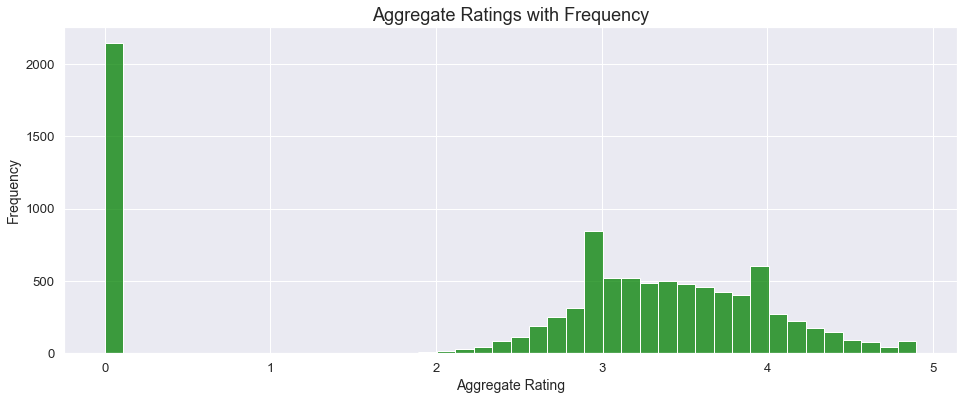

In [89]:
plt.figure(figsize=(16,6))
sns.histplot(restaurants_data1_new['Aggregate_rating'], color='green')
plt.title("Aggregate Ratings with Frequency", fontsize=18)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Aggregate Rating", fontsize=14)
plt.show()

##### many restaurants have very low ratings i.e  zero.
##### most of the rating lies between 2 to 5.
##### rating 3, count is quite higher i.e around 800 or 900.
##### between rating 3 to 4, rating count are quite good. But after 5 count of rating started falling down again. 
##### Here, we can conclude that customer are most likely to give rating around 3 to 4, and
##### average no. of people has given rating above 3 and below 4.

In [90]:
# Highest Rating Restaurants
max_rate =restaurants_data1_new.sort_values(by='Aggregate_rating', ascending=False).groupby(['Country','City'],
                                                                                       as_index=False).first()
# Lowest Rating Restaurants
min_rate = restaurants_data1_new.sort_values(by='Aggregate_rating', ascending=False).groupby(['Country','City'],
                                                                                       as_index=False).last()
# New dataframe created for high rated restaurants

df_max = max_rate[['Country','City','Restaurant_Name','Aggregate_rating']]

# New dataframe created for low rated restaurants
df_min = min_rate[['Country','City','Restaurant_Name','Aggregate_rating']]
# Merging 2 dataframes into a single dataframe

rating = df_max.merge(df_min, left_on='City', right_on='City',how='inner')
rating

,Country_x,City,Restaurant_Name_x,Aggregate_rating_x,Country_y,Restaurant_Name_y,Aggregate_rating_y
0,Australia,Armidale,Whitebull Hotel,3.5,Australia,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Australia,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Australia,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,Australia,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,Australia,The Belle General,4.1
...,...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,United States,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,United States,Blue House Cafe,4.3
138,United States,Waterloo,Tokyo Japanese Steak House,3.9,United States,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,United States,Theo Yianni's Authentic Greek Restaurant,3.9


In [91]:
# Here we have 2 country column, so we drop 1 column

rating.drop('Country_y', axis=1,inplace=True)


In [92]:
# changing the names of the columns

rating.columns = ['Country','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']
rating.columns

Index(['Country', 'City', 'Highest Rated Restaurant', 'Rating Max',
       'Lowest Rated Restaurant', 'Rating Min'],
      dtype='object')

In [93]:
rating.head()

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1


In [94]:
# Since India and USA has the most number of restaurants, 
# we will try to see the distribution of restaurants ratings for these two countries.

# storing the dataframe only for country 'India'
rating_India = rating[rating['Country']=='India']
rating_India.head()

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
30,India,Agra,Sheroes Hangout,4.9,The Charcoal Chimney,3.4
31,India,Ahmedabad,Cryo Lab,4.6,MoMo CafÌ© - Courtyard By Marriott,3.6
32,India,Allahabad,Eat On,3.7,Pind Balluchi,3.2
33,India,Amritsar,Gurdas Ram Jalebi Wala,4.1,Bon Gateau,3.4
34,India,Aurangabad,Bhoj Restaurant,3.7,Domino's Pizza,3.1


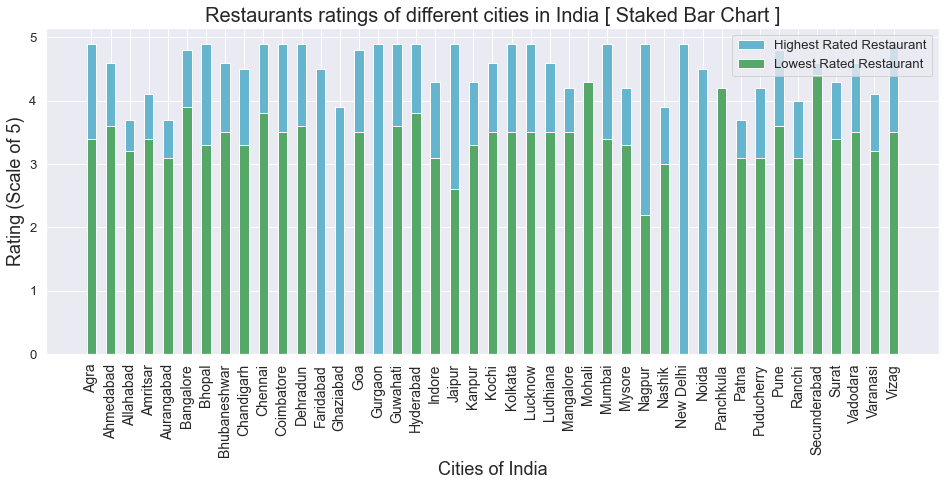

In [95]:
#converting the series to list
city_i = rating_India['City'].tolist()

# converting the series to list
rate_max_i = rating_India['Rating Max'].tolist()

# converting the series to list
rate_min_i = rating_India['Rating Min'].tolist()

# converting the series to list
rest_name_high_i = rating_India['Highest Rated Restaurant'].tolist()

# converting the series to list
rest_name_low_i = rating_India['Lowest Rated Restaurant'].tolist()

# Plotting rating of cities in India using stached bar chart

plt.figure(figsize=(16,6))
w=0.5
plt.bar(city_i,rate_max_i,w,label="Highest Rated Restaurant", color='c')
plt.bar(city_i,rate_min_i,w,label="Lowest Rated Restaurant", color='g')
plt.title('Restaurants ratings of different cities in India [ Staked Bar Chart ]', fontsize=20)
plt.xlabel('Cities of India', fontsize=18)
plt.ylabel('Rating (Scale of 5)', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.legend(loc='upper right')
plt.show()

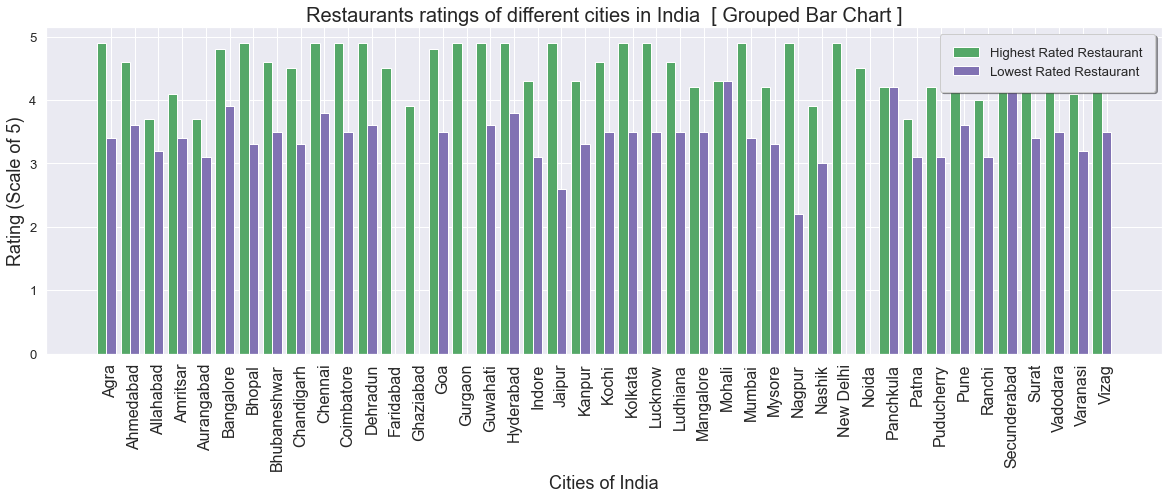

In [96]:
# Plotting rating of cities in India using grouped bar chart

plt.figure(figsize=(20,6))
w=0.4
x = city_i
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,rate_max_i,w,label="Highest Rated Restaurant", color='g')
plt.bar(bar2,rate_min_i,w,label="Lowest Rated Restaurant", color='m')
plt.title('Restaurants ratings of different cities in India  [ Grouped Bar Chart ]', fontsize=20)
plt.xlabel('Cities of India', fontsize=18)
plt.ylabel('Rating (Scale of 5)', fontsize=18)
plt.xticks(bar1+w,x,rotation=90, fontsize=16)
plt.legend(loc='upper right',shadow=True,fancybox=True,borderpad=1)
plt.show()




#### From figure we could say-
#### this is how high and low rated restaurants are arranged based on their rating. 
#### Faridabad, Ghazoabad, New Delhi and Noida have no lower rated Restaurants.
#### so we can above 4 cities are more profitable cities for running their business.

In [97]:
# storing the dataframe only for country 'USA'
rating_USA = rating[rating['Country']=='United States']
rating_USA.head()

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
106,United States,Albany,Guang Zhou Chinese Restaurant,3.9,BJ's Country Buffet,3.3
107,United States,Athens,Sr. Sol 1,4.6,The Grill,3.7
108,United States,Augusta,Rae's Coastal Cafe,4.9,Sconyers Bar B Que,3.5
109,United States,Boise,Flatbread Neapolitan Pizzeria,4.6,Chandlers Steakhouse,3.9
110,United States,Cedar Rapids/Iowa City,Shorts Burger and Shine,4.9,Bluebird Diner,3.6


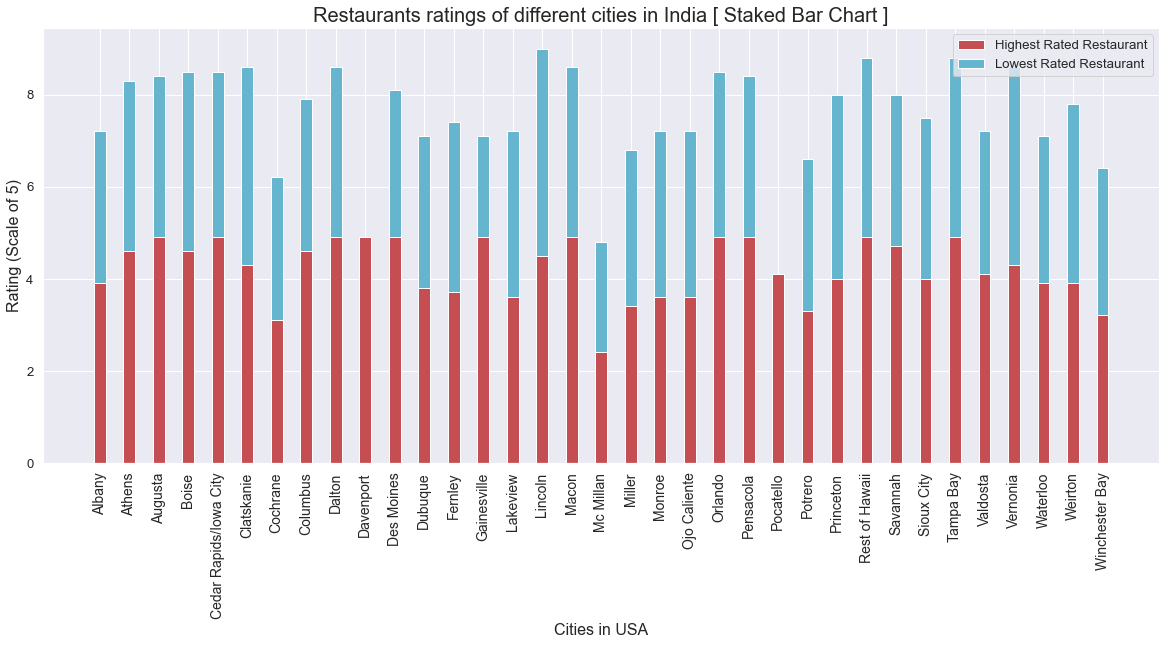

In [98]:
# converting the series to list
city_u = rating_USA['City'].tolist()

# converting the series to list
rate_max_u = rating_USA['Rating Max'].tolist()

# converting the series to list
rate_min_u = rating_USA['Rating Min'].tolist()

# converting the series to list
rest_name_high_u = rating_USA['Highest Rated Restaurant'].tolist()

# converting the series to list
rest_name_low_u = rating_USA['Lowest Rated Restaurant'].tolist()
# plotting rating of cities in USA using stached bar chart

plt.figure(figsize=(20,8))
w=0.4
plt.bar(city_u, rate_max_u,w,label='Highest Rated Restaurant', color='r')
plt.bar(city_u, rate_min_u,w,bottom= rate_max_u,label='Lowest Rated Restaurant',color='c')
plt.title('Restaurants ratings of different cities in India [ Staked Bar Chart ]', fontsize=20)
plt.ylabel('Rating (Scale of 5)', fontsize=16)
plt.xlabel('Cities in USA', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.legend(loc='upper right')
plt.show()

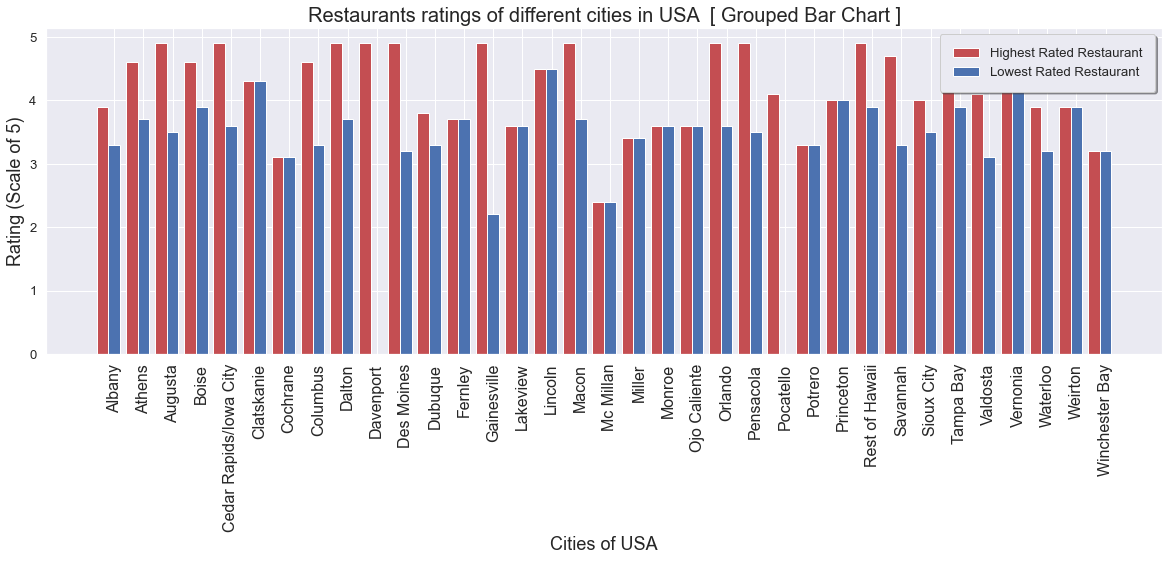

In [99]:
# Plotting rating of cities in USA using grouped bar chart

plt.figure(figsize=(20,6))
w=0.4
x = city_u
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,rate_max_u,w,label="Highest Rated Restaurant", color='r')
plt.bar(bar2,rate_min_u,w,label="Lowest Rated Restaurant", color='b')
plt.title('Restaurants ratings of different cities in USA  [ Grouped Bar Chart ]', fontsize=20)
plt.xlabel('Cities of USA', fontsize=18)
plt.ylabel('Rating (Scale of 5)', fontsize=18)
plt.xticks(bar1+w,x,rotation=90, fontsize=16)
plt.legend(loc='upper right',shadow=True,fancybox=True,borderpad=1)
plt.show()

##### this is how high and low rated restaurants are arranged based on their rating. 
##### Davenport, Pocatello have no lower rated Restaurants.
##### 2 cities are more profitable cities  for running business.

# Explain the factors in the data that may have an effect on ratings.
# For example, number of cuisines, cost, delivery option, etc.

In [100]:
restaurants_data1_new.corr()

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Has_Table_booking,Price_range,Aggregate_rating,Votes,Number of restaurants in the country,Standalized_Cost
Restaurant_ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.110071,-0.134540,-0.326212,-0.147023,-0.144498,0.005144
Country_Code,0.148471,1.000000,-0.698299,0.019792,0.043225,-0.061682,0.243327,0.282189,0.154530,-0.866347,0.051042
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,0.100488,-0.078939,-0.116818,-0.085101,0.602669,0.037840
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,0.054658,-0.166688,0.000516,-0.022962,0.263483,-0.111376
Average_Cost_for_two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.007758,0.075083,0.051792,0.067783,-0.134380,0.999311
Has_Table_booking,-0.110071,-0.061682,0.100488,0.054658,0.007758,1.000000,0.501925,0.189998,0.169422,0.067657,-0.014126
Price_range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,0.501925,1.000000,0.437944,0.309444,-0.277931,0.050208
Aggregate_rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.189998,0.437944,1.000000,0.313691,-0.276949,0.042621
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.169422,0.309444,0.313691,1.000000,-0.143126,0.059674
Number of restaurants in the country,-0.144498,-0.866347,0.602669,0.263483,-0.134380,0.067657,-0.277931,-0.276949,-0.143126,1.000000,-0.142490


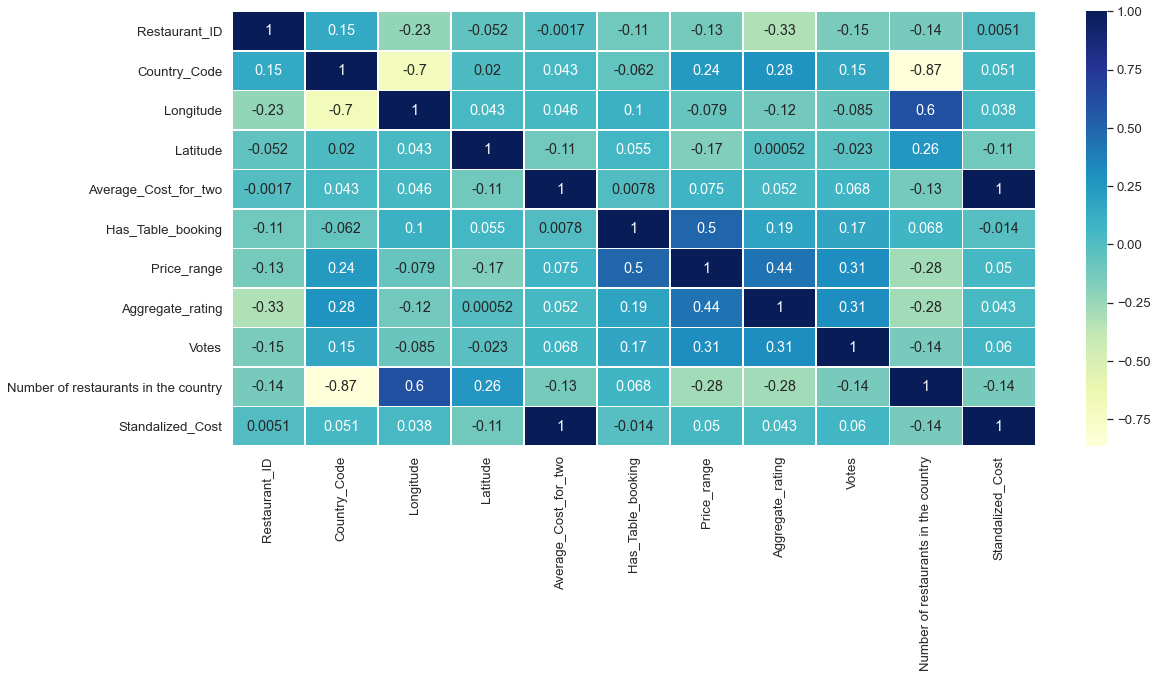

In [101]:
# creating a heatmap to know relation between variables
fig, ax = plt.subplots(figsize=(18,8))
dataplot = sns.heatmap(restaurants_data1_new.corr(), cmap="YlGnBu", annot=True,linewidth=0.5,ax=ax)
#heat = merged1.pivot("Average_Cost_for_two", "Aggregate_rating")
#ax = sns.heatmap(heat, annot=True, fmt="d")

#### We find from the heat map that there is no single variable that affects the rating strongly, however table booking,online delivery,avg price for two and price range, number of votes do play a part in affecting the rating of a restaurant.

In [102]:
# Download the file in Excel format
restaurants_data1_new.to_excel('data1(restaurants).xlsx', header=True, index=False)

# TABLEAU

### Visualize the variables using Tableau to help user explore the data and 
### create a better understanding of the restaurants to identify the ‘’star’’ restaurant

### Demonstrate the variables associated with each other and factors to build a dashboard

In [104]:
#https://public.tableau.com/app/profile/sankar.chakraborty/viz/Resturantsrecommendationcapstoneprojects/Dashboard1?publish=yes

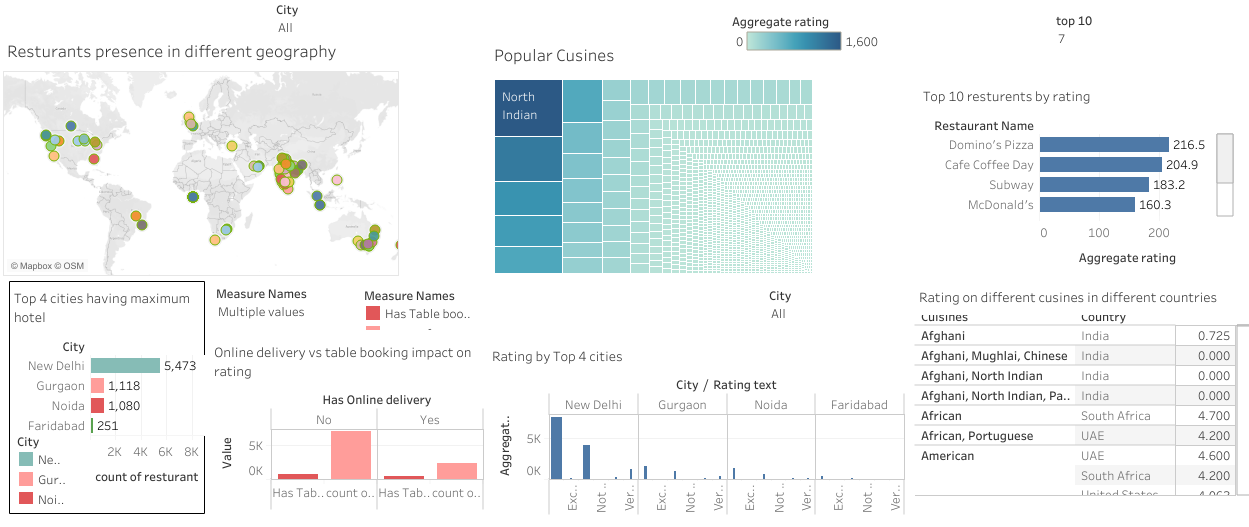

In [107]:
from IPython import display
display.Image(r"C:\Users\xyz\Downloads\Dashboard 1 (1).png")